In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('content/')

Mounted at content/


In [ ]:
df1=pd.read_csv('content/MyDrive/DAPR/train.csv')

In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
NoAge=df1.loc[df1['Age'].isna()==True]
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
NoAge.shape

(177, 12)

In [14]:
Df_Num = df1.select_dtypes(include='number')

In [17]:
from sklearn.impute import KNNImputer

In [29]:
imputer = KNNImputer(n_neighbors=2, weights='distance')
Df_Imputed=imputer.fit_transform(Df_Num)

Df_Num_Imputed = pd.DataFrame(Df_Imputed,columns=Df_Num.columns)
Df_Num_Imputed.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.691188,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.685515,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.286206,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.355810,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
Df_Num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
Df_Imputed=imputer.fit_transform(Df_Num)

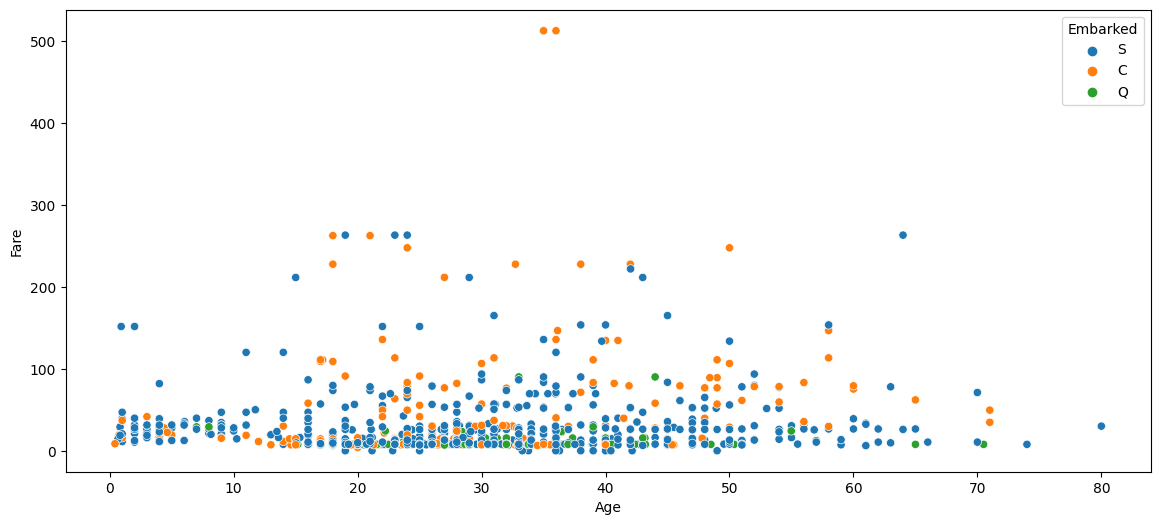

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

Df_Num_Imputed['Embarked']=df1['Embarked']
fig = plt.figure(figsize=(14,6))
ax=sns.scatterplot(x='Age', y='Fare', hue='Embarked',data=Df_Num_Imputed)

In [47]:
Df_Num_Imputed=Df_Num_Imputed.drop(['PassengerId'],axis=1)

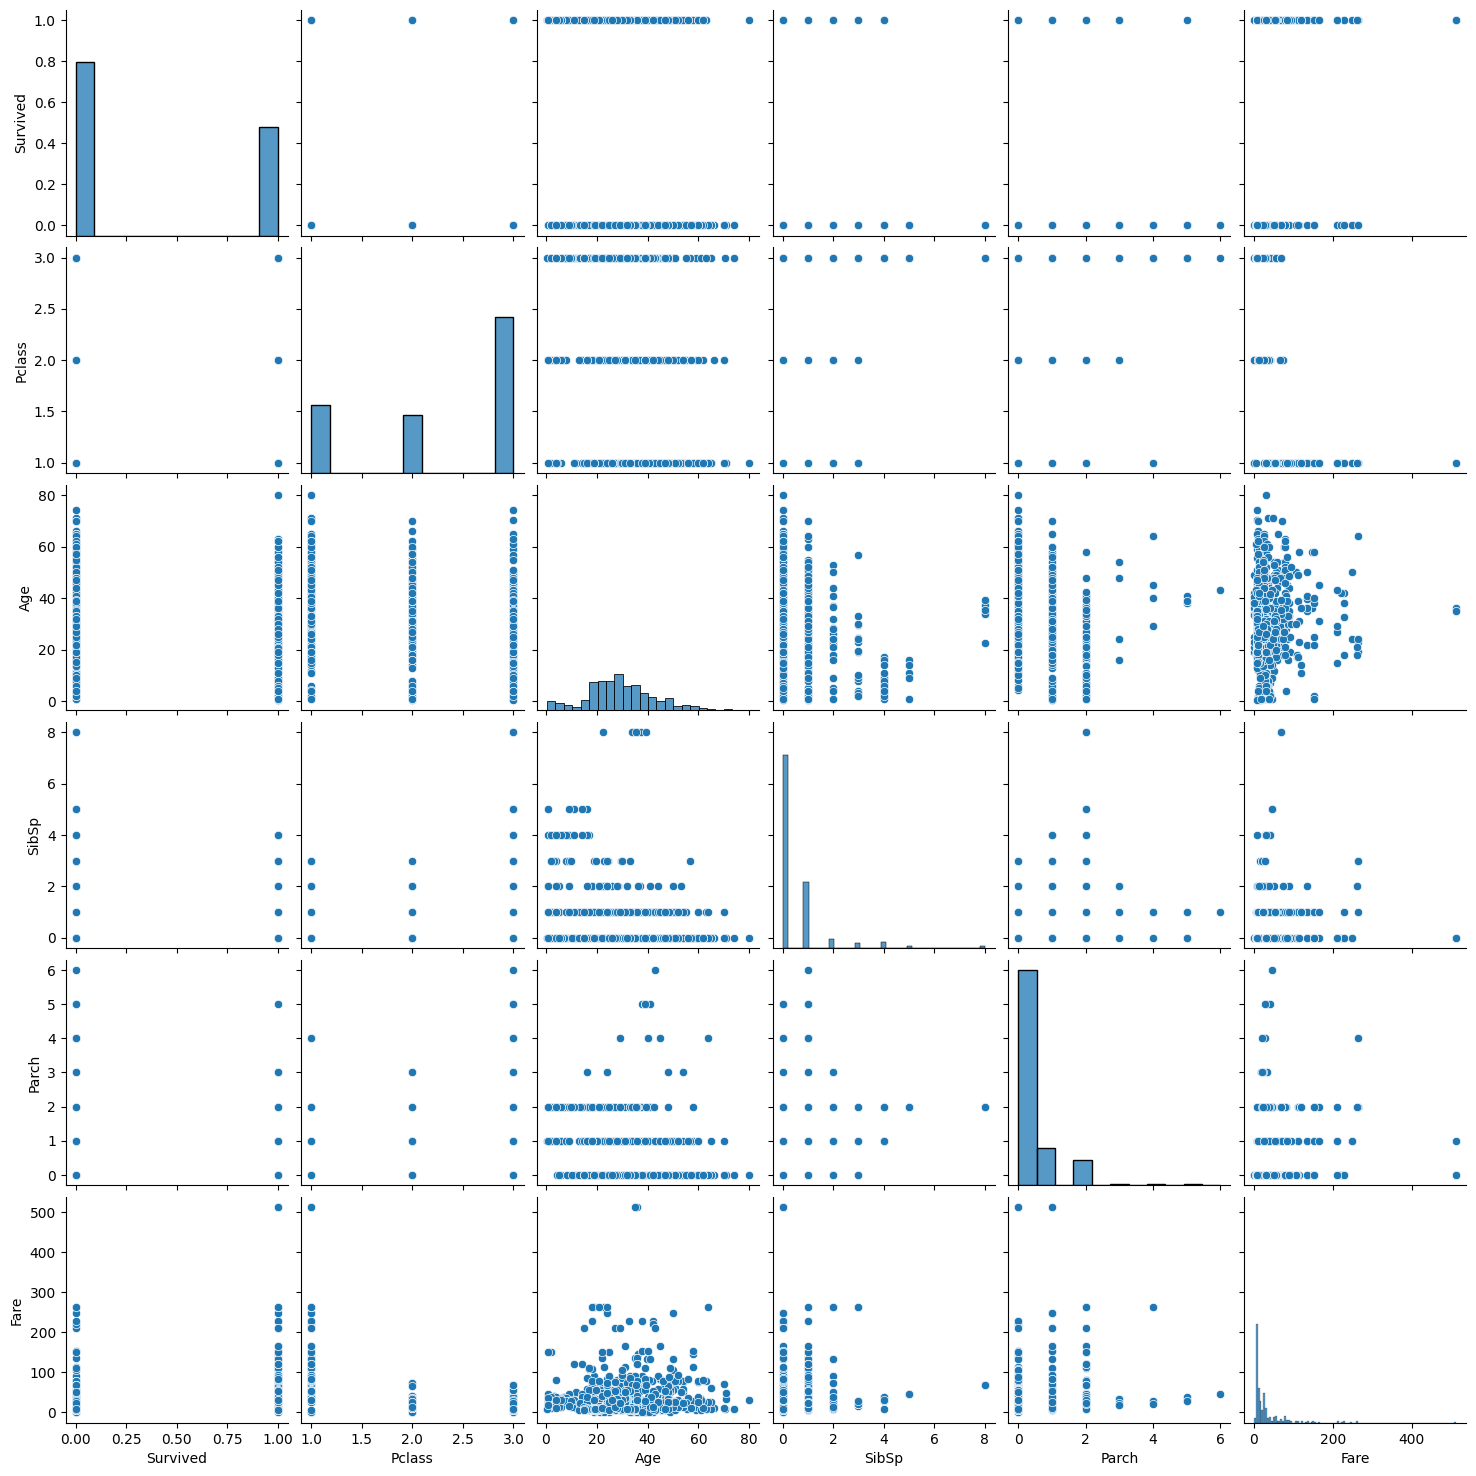

In [48]:
sns.pairplot(Df_Num_Imputed)